<a href="https://colab.research.google.com/github/AnkurSahoo45/AnkurSahoo45/blob/main/emotionDetector3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankursahoo","key":"d20ade8f751fd9063c52b229ca45a666"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 81% 49.0M/60.3M [00:00<00:00, 183MB/s]
100% 60.3M/60.3M [00:00<00:00, 172MB/s]


In [ ]:
!mkdir dataset

In [ ]:
!unzip fer2013.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/sad/Training_65242339.jpg  
  inflating: dataset/train/sad/Training_65267116.jpg  
  inflating: dataset/train/sad/Training_65275626.jpg  
  inflating: dataset/train/sad/Training_6529266.jpg  
  inflating: dataset/train/sad/Training_65329617.jpg  
  inflating: dataset/train/sad/Training_65338712.jpg  
  inflating: dataset/train/sad/Training_65338797.jpg  
  inflating: dataset/train/sad/Training_65387162.jpg  
  inflating: dataset/train/sad/Training_65404494.jpg  
  inflating: dataset/train/sad/Training_65426218.jpg  
  inflating: dataset/train/sad/Training_65430136.jpg  
  inflating: dataset/train/sad/Training_65437377.jpg  
  inflating: dataset/train/sad/Training_6545735.jpg  
  inflating: dataset/train/sad/Training_65463385.jpg  
  inflating: dataset/train/sad/Training_65473985.jpg  
  inflating: dataset/train/sad/Training_65502829.jpg  
  inflating: dataset/train/sad/Training_65505359.jpg  
  inflating: dat

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical, load_img
from sklearn.cluster import AgglomerativeClustering
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
TRAIN_DIR = '/content/dataset/train'
TEST_DIR = '/content/dataset/test'
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
    return image_paths,labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

In [ ]:
train.shape

(28709, 2)

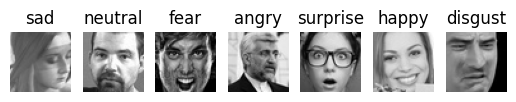

In [ ]:
import cv2
temp = 1
for i in set(train.label):
  img_path = train[train['label'] == i]['image'].head(1).values[0]
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(1,7,temp)
  plt.imshow(img)
  plt.title(i)
  plt.axis(False)
  temp += 1

In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

In [ ]:
test.shape

(7178, 2)

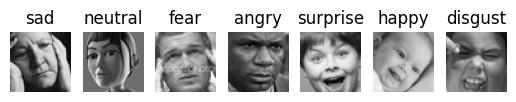

In [ ]:
temp = 1
for i in set(test.label):
  img_path = test[test['label'] == i]['image'].head(1).values[0]
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(1,7,temp)
  plt.imshow(img)
  plt.title(i)
  plt.axis(False)
  temp += 1

In [ ]:
from tqdm import tqdm
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode = "grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [ ]:
train_features = extract_features(train['image'])

100%|██████████| 28709/28709 [00:04<00:00, 5979.60it/s]


In [ ]:
test_features = extract_features(test['image'])

100%|██████████| 7178/7178 [00:01<00:00, 4368.36it/s]


In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward')

In [ ]:
train_labels = agglomerative.fit_predict(y_train)

In [ ]:
set(train_labels)

{0, 1}

In [ ]:
train_labels = to_categorical(train_labels)

In [ ]:
train_labels.shape

(28709, 2)

In [ ]:
y_test = agglomerative.fit_predict(y_test)

In [ ]:
test_labels = to_categorical(y_test)

In [ ]:
test_labels.shape

(7178, 2)

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 conv2d_14 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                 

In [ ]:
earlystopping = EarlyStopping(monitor ="val_loss",
                              patience = 5,
                              verbose = 1,
                              restore_best_weights = True)
history = model.fit(x = x_train, y = train_labels, epochs = 50, validation_data = (x_test,test_labels), callbacks = [earlystopping])

Epoch 1/50
898/898 [==============================] - 56s 50ms/step - loss: 0.5726 - accuracy: 0.7487 - val_loss: 0.5663 - val_accuracy: 0.7529
Epoch 2/50
898/898 [==============================] - 42s 47ms/step - loss: 0.5658 - accuracy: 0.7487 - val_loss: 0.5594 - val_accuracy: 0.7529
Epoch 3/50
898/898 [==============================] - 43s 48ms/step - loss: 0.5654 - accuracy: 0.7487 - val_loss: 0.5593 - val_accuracy: 0.7529
Epoch 4/50
898/898 [==============================] - 46s 51ms/step - loss: 0.5652 - accuracy: 0.7487 - val_loss: 0.5592 - val_accuracy: 0.7529
Epoch 5/50
898/898 [==============================] - 46s 51ms/step - loss: 0.5649 - accuracy: 0.7487 - val_loss: 0.5592 - val_accuracy: 0.7529
Epoch 6/50
898/898 [==============================] - 46s 51ms/step - loss: 0.5650 - accuracy: 0.7487 - val_loss: 0.5600 - val_accuracy: 0.7529
Epoch 7/50
898/898 [==============================] - 43s 48ms/step - loss: 0.5647 - accuracy: 0.7487 - val_loss: 0.5592 - val_accuracy:

In [ ]:
model.evaluate(x_test, test_labels)

225/225 [==============================] - 3s 12ms/step - loss: 0.5592 - accuracy: 0.7529


[0.5591758489608765, 0.7528559565544128]

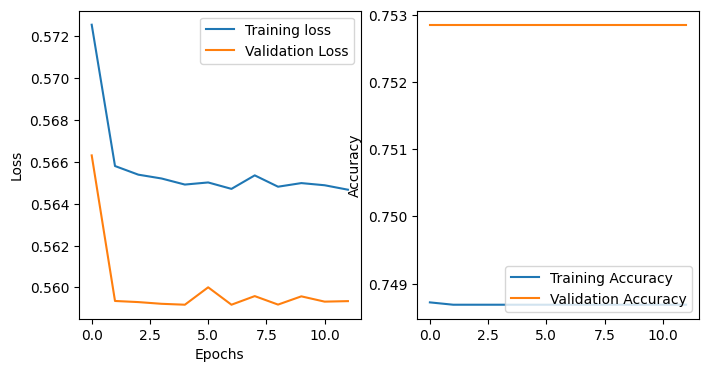

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_json = model.to_json()
with open("model_2.json",'w') as json_file:
    json_file.write(model_json)
model.save("model_2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = 1)

225/225 [==============================] - 3s 12ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      5404
           1       0.00      0.00      0.00      1774

    accuracy                           0.75      7178
   macro avg       0.38      0.50      0.43      7178
weighted avg       0.57      0.75      0.65      7178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[5404    0]
 [1774    0]]


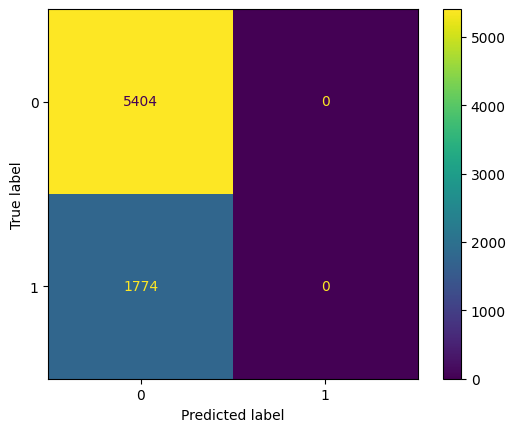

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(matrix)
display.plot()

In [ ]:
from keras.layers import LSTM, Reshape, TimeDistributed

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(TimeDistributed(Flatten()))

# model.add(Reshape((512, -1)))

model.add(LSTM(1024, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                   

In [ ]:
earlystopping = EarlyStopping(monitor ="val_loss",
                              patience = 5,
                              verbose = 1,
                              restore_best_weights = True)
history = model.fit(x = x_train, y = train_labels, epochs = 50, validation_data = (x_test, test_labels), callbacks = [earlystopping])

Epoch 1/50
898/898 [==============================] - 57s 51ms/step - loss: 0.5682 - accuracy: 0.7483 - val_loss: 0.5600 - val_accuracy: 0.7529
Epoch 2/50
898/898 [==============================] - 42s 47ms/step - loss: 0.5667 - accuracy: 0.7487 - val_loss: 0.5597 - val_accuracy: 0.7529
Epoch 3/50
898/898 [==============================] - 42s 46ms/step - loss: 0.5661 - accuracy: 0.7487 - val_loss: 0.5628 - val_accuracy: 0.7529
Epoch 4/50
898/898 [==============================] - 44s 49ms/step - loss: 0.5661 - accuracy: 0.7487 - val_loss: 0.5593 - val_accuracy: 0.7529
Epoch 5/50
898/898 [==============================] - 44s 49ms/step - loss: 0.5657 - accuracy: 0.7487 - val_loss: 0.5592 - val_accuracy: 0.7529
Epoch 6/50
898/898 [==============================] - 44s 49ms/step - loss: 0.5654 - accuracy: 0.7487 - val_loss: 0.5632 - val_accuracy: 0.7529
Epoch 7/50
898/898 [==============================] - 44s 49ms/step - loss: 0.5652 - accuracy: 0.7487 - val_loss: 0.5595 - val_accuracy:

In [ ]:
model.evaluate(x_test, test_labels)

225/225 [==============================] - 3s 15ms/step - loss: 0.5592 - accuracy: 0.7529


[0.5591764450073242, 0.7528559565544128]

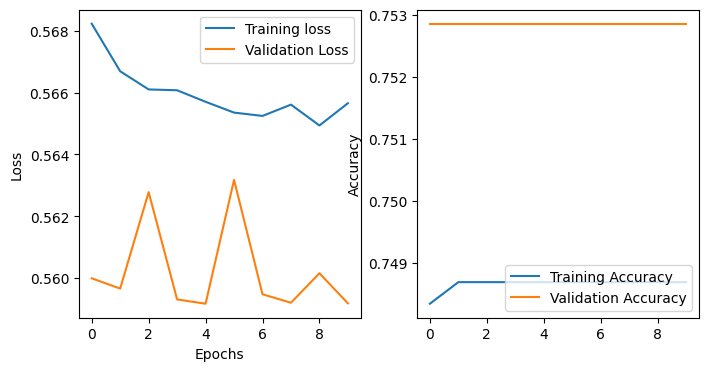

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(1024, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(LSTM(512, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_14 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 44, 44, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                      

In [ ]:
earlystopping = EarlyStopping(monitor ="val_loss",
                              patience = 5,
                              verbose = 1,
                              restore_best_weights = True)
history = model.fit(x = x_train, y = train_labels, epochs = 50, validation_data = (x_test, test_labels), callbacks = [earlystopping])

Epoch 1/50
898/898 [==============================] - 66s 53ms/step - loss: 0.6351 - accuracy: 0.6981 - val_loss: 0.5575 - val_accuracy: 0.7529
Epoch 2/50
898/898 [==============================] - 42s 47ms/step - loss: 0.5638 - accuracy: 0.7485 - val_loss: 0.5645 - val_accuracy: 0.7529
Epoch 3/50
898/898 [==============================] - 43s 47ms/step - loss: 0.5029 - accuracy: 0.7690 - val_loss: 0.4062 - val_accuracy: 0.8200
Epoch 4/50
898/898 [==============================] - 42s 47ms/step - loss: 0.3864 - accuracy: 0.8377 - val_loss: 0.3873 - val_accuracy: 0.8388
Epoch 5/50
898/898 [==============================] - 43s 48ms/step - loss: 0.3449 - accuracy: 0.8629 - val_loss: 0.4246 - val_accuracy: 0.7969
Epoch 6/50
898/898 [==============================] - 43s 48ms/step - loss: 0.3180 - accuracy: 0.8720 - val_loss: 0.3264 - val_accuracy: 0.8736
Epoch 7/50
898/898 [==============================] - 43s 48ms/step - loss: 0.3040 - accuracy: 0.8817 - val_loss: 0.2716 - val_accuracy:

In [ ]:
model.evaluate(x_test, test_labels)

225/225 [==============================] - 3s 13ms/step - loss: 0.2716 - accuracy: 0.8952


[0.2716059982776642, 0.8952354192733765]

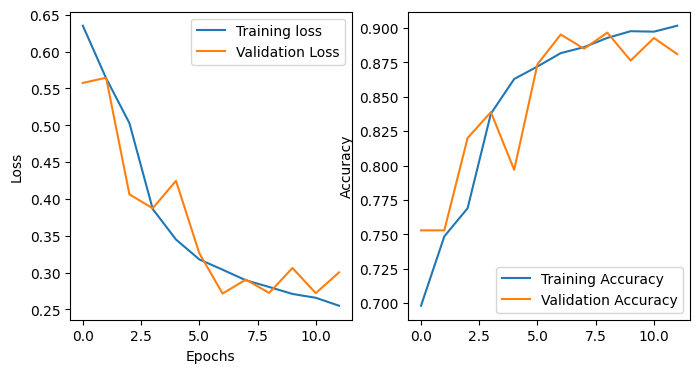

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_json = model.to_json()
with open("model3.json",'w') as json_file:
    json_file.write(model_json)
model.save("model3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = 1)

225/225 [==============================] - 6s 11ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      5404
           1       0.82      0.74      0.78      1774

    accuracy                           0.90      7178
   macro avg       0.87      0.84      0.85      7178
weighted avg       0.89      0.90      0.89      7178



In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[5114  290]
 [ 462 1312]]


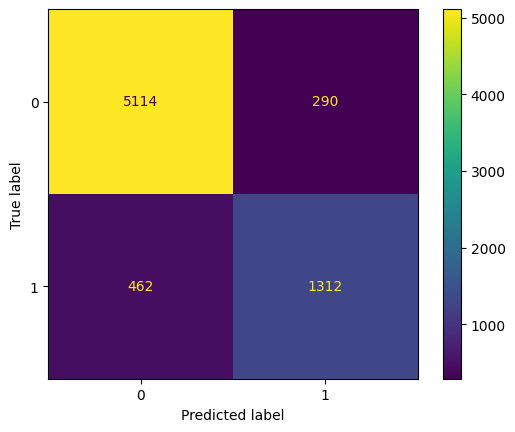

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(matrix)
display.plot()

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(64))
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_13 (Ba  (None, 46, 46, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_14 (Ba  (None, 44, 44, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                      

In [ ]:
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              patience = 5,
                              verbose = 1,
                              restore_best_weights = True)
history = model.fit(x = x_train,y = train_labels, epochs = 50, validation_data = (x_test,test_labels), callbacks=[earlystopping])

Epoch 1/50
898/898 [==============================] - 47s 39ms/step - loss: 0.5764 - accuracy: 0.7303 - val_loss: 0.5689 - val_accuracy: 0.7547
Epoch 2/50
898/898 [==============================] - 33s 37ms/step - loss: 0.4177 - accuracy: 0.8194 - val_loss: 0.6107 - val_accuracy: 0.7533
Epoch 3/50
898/898 [==============================] - 33s 37ms/step - loss: 0.3313 - accuracy: 0.8669 - val_loss: 0.2878 - val_accuracy: 0.8860
Epoch 4/50
898/898 [==============================] - 33s 36ms/step - loss: 0.2970 - accuracy: 0.8843 - val_loss: 0.4428 - val_accuracy: 0.7987
Epoch 5/50
898/898 [==============================] - 33s 37ms/step - loss: 0.2808 - accuracy: 0.8917 - val_loss: 0.2635 - val_accuracy: 0.8996
Epoch 6/50
898/898 [==============================] - 33s 37ms/step - loss: 0.2570 - accuracy: 0.9021 - val_loss: 0.2488 - val_accuracy: 0.9026
Epoch 7/50
898/898 [==============================] - 34s 38ms/step - loss: 0.2431 - accuracy: 0.9082 - val_loss: 0.2542 - val_accuracy:

In [ ]:
model.evaluate(x_test, test_labels)

225/225 [==============================] - 3s 11ms/step - loss: 0.2315 - accuracy: 0.9154


[0.23146912455558777, 0.9154360294342041]

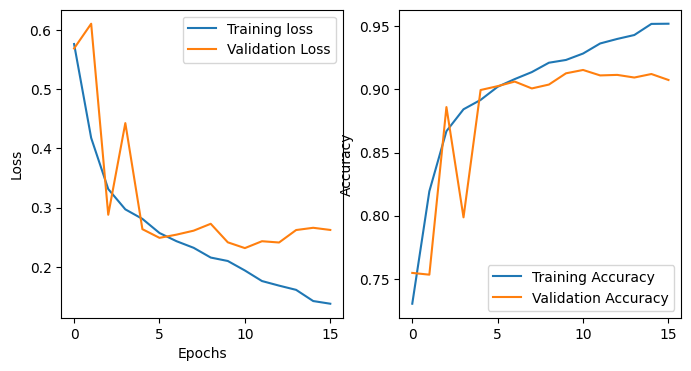

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_json = model.to_json()
with open("model.json",'w') as json_file:
    json_file.write(model_json)
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = 1)

225/225 [==============================] - 4s 9ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5404
           1       0.88      0.77      0.82      1774

    accuracy                           0.92      7178
   macro avg       0.90      0.87      0.88      7178
weighted avg       0.91      0.92      0.91      7178



In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[5213  191]
 [ 416 1358]]


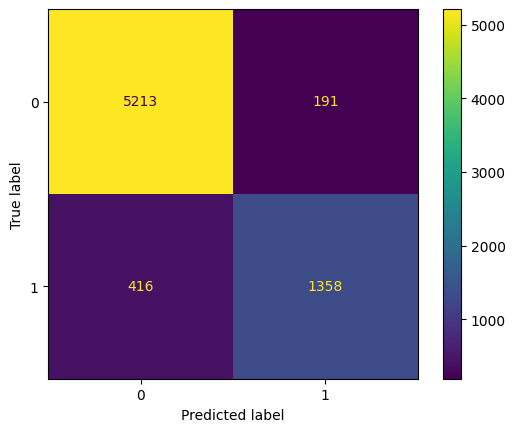

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(matrix)
display.plot()